In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# linear regression
## steps  
- prepare data
- build model
- define loss
- optimize model

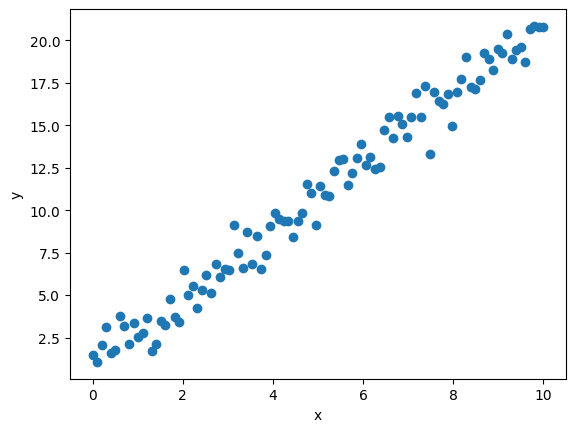

In [36]:
# Generate data 
np.random.seed(42)
# x is from 0 to 10, 100 points
x = np.linspace(0, 10, 100)
# y is a linear function of x plus some noise
a = 2
b = 1
y = a * x + b + np.random.normal(0, 1, 100)
plt.plot(x, y, 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()



In [37]:
# normalize the data to prevent over/underflow
def norm(x):
    return  (x - np.mean(x)) / np.std(x)
    


In [38]:
x_norm = norm(x)
y_norm = norm(y)

In [39]:
# set up tensorFlow placeholders, variables, and model
tf_x = tf.placeholder(tf.float32, name='x')
tf_y = tf.placeholder(tf.float32, name='y')
tf_a = tf.Variable(np.random.randn(), name='a')
tf_b = tf.Variable(np.random.randn(), name='b')

tf_y_pred = tf.add(tf.multiply(tf_x, tf_a), tf_b)


In [40]:
# set up loss function and optimizer
tf_loss = tf.reduce_sum(tf.pow(tf_y_pred - tf_y, 2)) / (2 * nTrain)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_loss) 


In [41]:
# initialize the variables and lunch the graph in the session   
init = tf.global_variables_initializer()
a_fit = 0
b_fit = 0
with tf.Session() as sess:
    sess.run(init)
    display_every = 50
    num_training_iter = 500
    
    # fit all training data and display the progress
    for it in range(num_training_iter):
        sess.run(optimizer, feed_dict={tf_x: x_norm, tf_y: y_norm})
        if (it + 1) % display_every == 0:
            c = sess.run(tf_loss, feed_dict={tf_x: x_norm, tf_y: y_norm})
            print('iteration: %d, loss: %.4f' % (it + 1, c))
    
    # print the final results
    cost = sess.run(tf_loss, feed_dict={tf_x: x_norm, tf_y: y_norm})
    a_fit = sess.run(tf_a)
    b_fit = sess.run(tf_b)
    print('Final training cost:', cost, "a:", sess.run(tf_a), "b:", sess.run(tf_b)) 

iteration: 50, loss: 1.0254
iteration: 100, loss: 0.2558
iteration: 150, loss: 0.0733
iteration: 200, loss: 0.0300
iteration: 250, loss: 0.0197
iteration: 300, loss: 0.0173
iteration: 350, loss: 0.0167
iteration: 400, loss: 0.0165
iteration: 450, loss: 0.0165
iteration: 500, loss: 0.0165
Final training cost: 0.016495358 a: 0.9865828 b: -0.00031582048


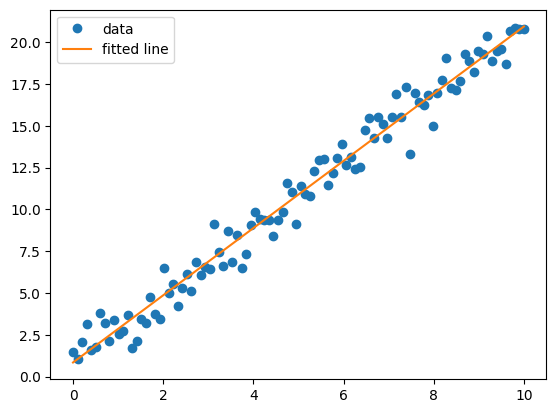

In [42]:
# plot the results
plt.plot(x, y, 'o', label='data')
plt.plot(x_norm*x.std()+x.mean(), (a_fit * x_norm + b_fit)*y.std() + y.mean(), label='fitted line')
plt.legend()
plt.show()